# TeV_spectrum

Description of TeV columns - https://github.com/gammapy/gamma-cat/blob/master/output/gammacat.ecsv

In [1]:
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

In this notebook catalog_TeV is an intersection of gev, tev and simbad catalogs.

In [2]:
catalog_TeV = pd.read_csv("markeddata/gevtevsimbad.txt", sep='\t', index_col=0)
catalog_TeV = catalog_TeV.reset_index(drop=True)

In [3]:
catalog_TeV[['s_MAIN_ID', 'tev_sed_e_ref', 'tev_sed_dnde', 'tev_sed_dnde_err']]

,s_MAIN_ID,tev_sed_e_ref,tev_sed_dnde,tev_sed_dnde_err
0,b'GCIRS 8',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...
1,b'[MCD2010] 13',[ 0.39789999 0.56220001 0.79430002 1.12...,[ 3.23300002e-12 4.40699994e-13 2.9500000...,[ nan nan nan nan nan nan nan nan nan ...
2,b'[MCD2010] 13',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...
3,b'Schulte 21',[ 0.79000002 1.25999999 2. 3.16...,[ 1.69999995e-12 4.99999998e-13 2.2999999...,[ 4.99999998e-13 1.49999994e-13 5.9999998...
4,b'2FGL J1019.0-5856',[ 0.40220299 0.79795301 1.23277998 1.90...,[ 2.25568609e-12 3.47791213e-13 2.2703089...,[ nan nan nan nan nan nan nan nan nan ...
5,b'[KRL2007b] 332',[ 0.73806798 1.29738998 2.29364991 4.04...,[ 1.83209992e-11 8.44120000e-12 1.8995499...,[ nan nan nan nan nan nan nan nan nan ...
6,b'V* V479 Sct',[ 0.277619 0.43024501 0.691719 1.11...,[ 3.43570006e-10 1.29701000e-10 4.9657198...,[ nan nan nan nan nan nan nan nan nan ...
7,b'LS I +61 303',[ 0.59841502 0.87828797 1.28896999 1.89...,[ 3.22340006e-12 9.27542006e-13 2.3246899...,[ nan nan nan nan nan nan nan nan nan ...
8,b'CXOU J095550.1+694034',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...
9,b'SSTGC 519103',[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...,[ nan nan nan nan nan nan nan nan nan ...


In [4]:
energies = [0.3, 1, 3, 10, 30]

Axe x - tev_sed_e_ref

Axe y - tev_sed_dnde

Red lines represent errors of tev_sed_dnde

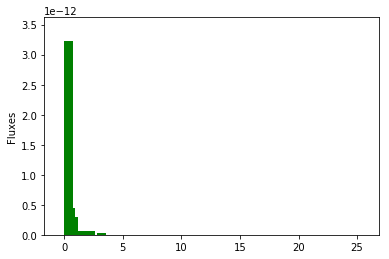

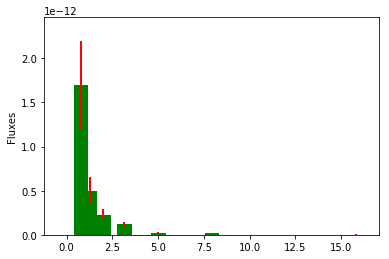

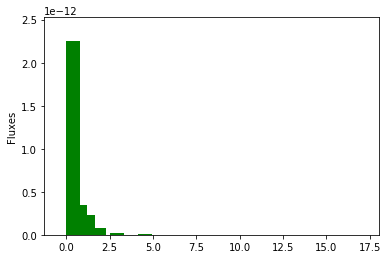

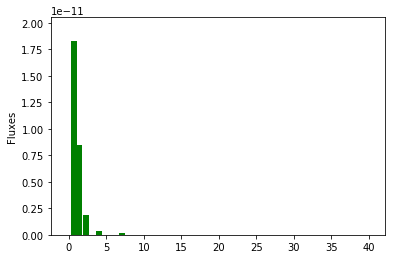

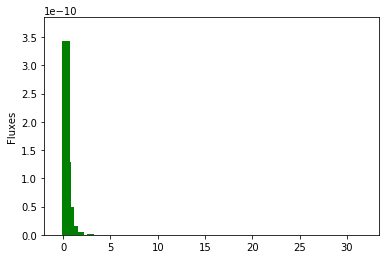

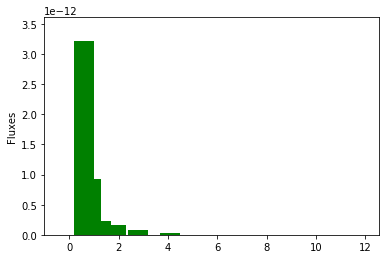

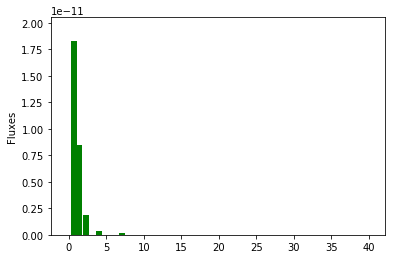

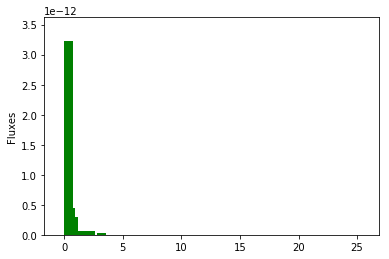

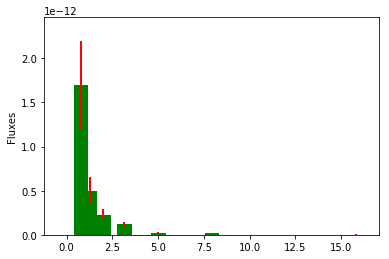

In [5]:
for idx in range(len(catalog_TeV)):
    plt.clf()
    x = catalog_TeV.loc[idx, 'tev_sed_e_ref']
    y = catalog_TeV.loc[idx, 'tev_sed_dnde']
    y_err = catalog_TeV.loc[idx,'tev_sed_dnde_err']

    #in catalog this columns are in string format
    #these three lines converge to a list of floats and nan -s
    x = [float(xi) for xi in x[1:-1].split()]
    y = [float(yi) for yi in y[1:-1].split()]
    y_err = [float(y_erri) for y_erri in y_err[1:-1].split()]
    
    
    #replace nan -s by zeros
    x = [0 if math.isnan(xi) else xi for xi in x]
    y = [0 if math.isnan(yi) else yi for yi in y]
    y_err = [0 if math.isnan(y_erri) else y_erri for y_erri in y_err]
    
    #verify that a spectrum is not empty 
    if max(x) > 0: 
        fig = plt.figure()
        ax = fig.add_subplot(111)

        ## the bars
        rects1 = ax.bar(x, y,
                color='green',
                yerr=y_err,
                error_kw=dict(elinewidth=2,ecolor='red'))

        # axes and labels
        ax.set_ylim(0,(max(y)+max(y_err))*1.12)
        ax.set_ylabel('Fluxes')
        #ax.set_xticks(x)
        plt.show()

The next two cells transform interpolate each sequential pair of points with a linear function and determine flux values of spectrum in :

- 0.3 TeV
- 1.0 TeV 
- 3.0 TeV
- 10.0 TeV
- 30.0 TeV

In [6]:
def linear_interpolate_spectrum(catalog_TeV, energies_log, plotting=False):
    """This function returns a pandas DataFrame with spectrum values in points given in energies_log.
    
    Input:
    catalog_TeV - pandas DataFrame with TeV columns 'tev_sed_e_ref', 'tev_sed_dnde' and 'tev_sed_dnde_err'
    energies_log - list of energies in TeV (float list)
    plotting - if True, plot spectrum in log-log scale
    
    Output:
    energies_TeV - pandas DataFrame with the same number of rows as in catalog_TeV,
                with the same number of columns as elements in energies_log
                with corresponding flux values
    
    """
    energies_TeV = pd.DataFrame(columns = ['tev_0.3TeV', 'tev_1TeV', 'tev_3TeV',  'tev_10TeV',  'tev_30TeV' ])
    
    for idx in range(len(catalog_TeV)):
        #if all values are nan, in a new spectrum the correspondant values will be 0
        res = [0]*5

        #extracting columns
        x = catalog_TeV.loc[idx, 'tev_sed_e_ref']
        y = catalog_TeV.loc[idx, 'tev_sed_dnde']
        y_err = catalog_TeV.loc[idx,'tev_sed_dnde_err']

        #transfor,img string to float list
        x = [float(xi) for xi in x[1:-1].split()]
        y = [float(yi) for yi in y[1:-1].split()]

        #determining which indexes are not nan
        indexes_not_nan = []
        for yi in (range(len(y))):
            if not math.isnan(y[yi]):
                indexes_not_nan.append(yi)

        #if not all values are nan
        if (len(indexes_not_nan) != 0):
            #x and y consist of not nan-values of x and y
            x = np.log([0 if math.isnan(x[xi]) else x[xi] for xi in indexes_not_nan])
            y = np.log([0 if math.isnan(y[yi]) else y[yi] for yi in indexes_not_nan])

            #plotting

            # linear interpolation on each pair of sequential points
            f = interp1d(x, y, fill_value = 'extrapolate')

            # find fluxes on determined energies
            res = f(energies_log)


            if (plotting):
                plt.clf()
                fig = plt.figure()
                ax = fig.add_subplot(111)
                #scattering points on the same figure
                ax.plot(x, y)
                ax.scatter(energies_log, f(energies_log))
                ax.set_xticks(x)  
                plt.show()

        #adding to pandas frame    
        energies = pd.DataFrame([res], columns = ['tev_0.3TeV', 'tev_1TeV', 'tev_3TeV',  'tev_10TeV',  'tev_30TeV' ])
        energies_TeV = energies_TeV.append(energies)
        energies_TeV = energies_TeV.reset_index(drop=True)
    return energies_TeV

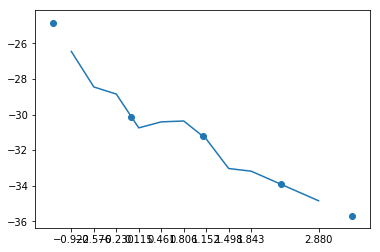

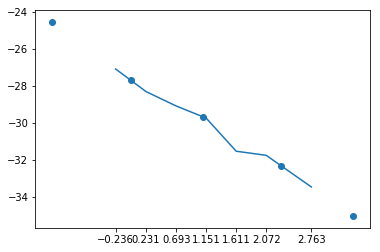

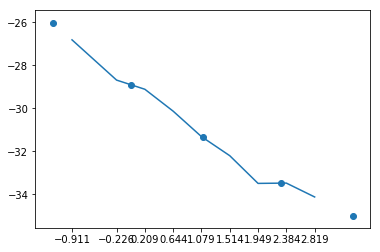

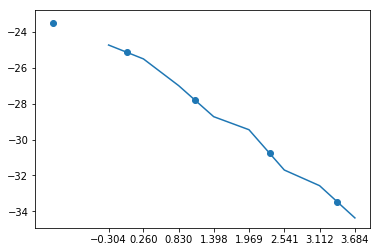

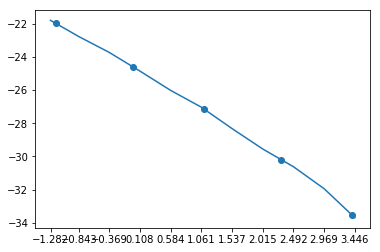

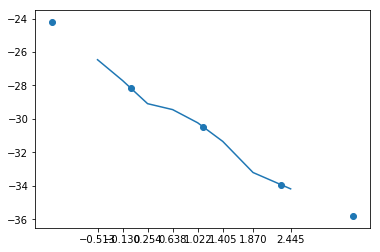

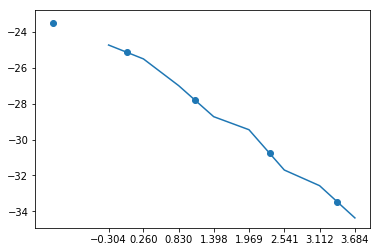

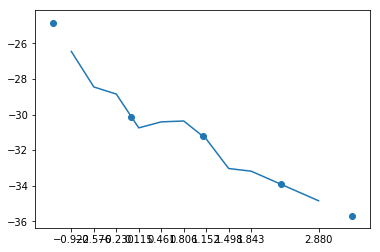

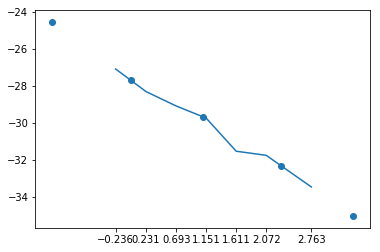

In [7]:
energies_log = np.log([0.3, 1, 3, 10, 30])
energies_TeV = linear_interpolate_spectrum(catalog_TeV, energies_log, plotting=True)
    

In [8]:
catalog_TeV.join(energies_TeV)

,level_0,gev_0FGL_Name,gev_1FGL_Name,gev_1FHL_Name,gev_2FGL_Name,gev_ASSOC1,gev_ASSOC2,gev_ASSOC_GAM1,gev_ASSOC_GAM2,gev_ASSOC_GAM3,...,tev_tevcat_name,tev_tgevcat_id,tev_tgevcat_name,tev_where,marked,tev_0.3TeV,tev_1TeV,tev_3TeV,tev_10TeV,tev_30TeV
0,79,b' ',b' ',b' ',b' ',b' ',b' ',b' ',b' ',b' ',...,b'TeV J1745-290d',107,b'TeV J1745-2900',b'gal',0,0,0,0,0,0
1,81,b' ',b'1FGL J1746.4-2849c',b'1FHL J1746.3-2851 ',b'2FGL J1746.6-2851c',b'PWN G0.13-0.11 ',b' ',b' ',b'3EG J1746-2851',b' ',...,b'TeV J1746-289',-9223372036854775808,b'',b'gal',0,-24.8294,-30.1174,-31.2144,-33.9203,-35.6831
2,108,b' ',b'1FGL J1746.4-2849c',b'1FHL J1746.3-2851 ',b'2FGL J1746.6-2851c',b'PWN G0.13-0.11 ',b' ',b' ',b'3EG J1746-2851',b' ',...,b'TeV J1746-289',-9223372036854775808,b'',b'gal',0,0,0,0,0,0
3,97,b'0FGL J2032.2+4122',b'1FGL J2032.2+4127 ',b'1FHL J2032.1+4125 ',b'2FGL J2032.2+4126 ',b'LAT PSR J2032+4127 ',b' ',b'1AGL J2032+4102',b' ',b' ',...,b'TeV J2032+415',146,b'TeV J2031+4133',b'gal',1,-24.5622,-27.7183,-29.6774,-32.3361,-35.0504
4,37,b'0FGL J1018.2-5858',b'1FGL J1018.6-5856 ',b'1FHL J1018.9-5855 ',b'2FGL J1019.0-5856 ',b'1FGL J1018.6-5856 ',b' ',b' ',b' ',b' ',...,b'TeV J1018-589',45,b'TeV J1018-5856',b'gal',1,-26.0175,-28.9085,-31.3528,-33.4752,-34.9799
5,87,b' ',b' ',b' ',b' ',b'HESS J1841-055 ',b' ',b' ',b' ',b' ',...,b'TeV J1840-055',125,b'TeV J1840-0533',b'gal',0,-23.4862,-25.1402,-27.8095,-30.7646,-33.4862
6,85,b'0FGL J1826.3-1451',b'1FGL J1826.2-1450 ',b'1FHL J1826.2-1450 ',b'2FGL J1826.3-1450 ',b'LS 5039 ',b' ',b' ',b' ',b' ',...,b'TeV J1826-148',119,b'TeV J1826-1449',b'gal',1,-21.964,-24.5975,-27.1306,-30.1943,-33.5299
7,10,b'0FGL J0240.3+6113',b'1FGL J0240.5+6113 ',b'1FHL J0240.2+6113 ',b'2FGL J0240.5+6113 ',b'LS I+61 303 ',b' ',b'1AGL J0242+6111',b' ',b'EGR J0240+6112 ',...,b'TeV J0240+612',14,b'TeV J0240+6115',b'gal',1,-24.2189,-28.1744,-30.4568,-33.9405,-35.8034
8,32,b' ',b'1FGL J0956.5+6938 ',b' ',b'2FGL J0955.9+6936 ',b'M 82 ',b' ',b' ',b' ',b' ',...,b'TeV J0955+696',40,b'TeV J0955+6940',b'egal',0,0,0,0,0,0
9,251,b' ',b'1FGL J1745.6-2900c',b'1FHL J1745.6-2900 ',b'2FGL J1745.6-2858 ',b' ',b' ',b' ',b' ',b' ',...,b'TeV J1745-290d',107,b'TeV J1745-2900',b'gal',0,0,0,0,0,0


In [9]:
catalog_TeV.to_csv("markeddata/gevtevsimbad_TeVspectrum.txt", sep='\t')